
# Project: WeRateDogs Data Wrangling & Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#store">Storage</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will be wrangling data from WeRateDogs with Twitter account, @dog_rates. Tweets from this account rates people's dogs with humorous comments about the dog, with most dogs scoring above 10/10 because _'they are good dogs..'_. This project mainly assesses data wrangling skills but our tidy data  will also be analyzed on _retweets count_, _likes count_ and _ratings._


### _Questions_
- __What is the most popular breed of dog?__
- __What factors determine likes count and retweets count?__


_These questions will be addressed by the following sub-questions:_

> 1. What is the correlation between likes count and retweets count?
2. What is the most common dog name?
3. What is the most used tweet source?
4. Which dog stage got the most likes and retweets?
5. Which dog breed got the most likes and retweets?
6. Which month(s) had the highest retweets and likes?
7. Do tweets with higher scores (ratings) get better retweets and likes?
* _*Which dog is the most popular?_

<a id='wrangling'></a>
## Data Wrangling
> We will __gather__ all the data needed, visually and programmatically __assess__ the dataset for content and structural issues, and then __clean__ the data using the `define`, `code` and `test` process.

### Gather

In [1]:
# Import packages to be used

import pandas as pd
import numpy as np
import tweepy as tp
import requests
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

# Programmatically download the image predictions file

folder_name = 'Project 2'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [2]:
# Read in manually downloaded twitter archive data & TSV file

df_tweets = pd.read_csv('twitter-archive-enhanced.csv')
df_images = pd.read_csv('image-predictions.tsv', sep='\t')

# Create the Twitter API object

consumer_key = '*****'
consumer_secret = '*****'
access_token = '*****'
access_secret = '*****'

auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tp.API(auth, wait_on_rate_limit=True)

# Query Twitter API for tweet IDs in the archive & save each JSON data as a new line in a text file

error_for_id = []
with open('tweet_json.txt', encoding='utf=8', mode='w') as file:
    for id_tweet in list(df_tweets.tweet_id):
        try:
            tweet = api.get_status(id_tweet, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            error_for_id.append(id_tweet)
            print('Failed', id_tweet)

In [3]:
# Preview entries of the tweet data for additional columns of interest

tweet_json = pd.read_json('tweet_json.txt', lines=True)
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [4]:
# Load the JSON data from the text file and read the data line by line into a dictionary list

df_list = []
with open('tweet_json.txt', 'r', encoding='utf=8') as file:
    for line in file:
        tweet = json.loads(line)
        df_list.append({'tweet_id':tweet['id'], 'retweet_count':tweet['retweet_count'],
                           'like_count':tweet['favorite_count']})
            
# Create a dataframe from the list of dictionaries

df_counts = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'like_count'])

### Assess

In [5]:
# Preview the counts dataset

df_counts

,tweet_id,retweet_count,like_count
0,892420643555336193,7015,33834
1,892177421306343426,5302,29351
2,891815181378084864,3483,22070
3,891689557279858688,7229,36962
4,891327558926688256,7768,35337
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,246
2324,666033412701032449,36,99
2325,666029285002620928,39,112


In [6]:
# Preview the tweets dataset

df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
# Preview the images dataset

df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
# Display concise summary of counts dataset

df_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2327 non-null   int64
 1   retweet_count  2327 non-null   int64
 2   like_count     2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [9]:
# Display concise summary of tweets dataset

df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# Display concise summary of images dataset

df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
# Check for duplicated columns in our datasets

all_columns = pd.Series(list(df_counts) + list(df_tweets) + list(df_images))
all_columns[all_columns.duplicated()]

3     tweet_id
20    tweet_id
dtype: object

In [12]:
# Display descriptive statistics for counts dataset

df_counts.describe()

,tweet_id,retweet_count,like_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2473.037817,7059.571551
std,6.820795e+16,4188.352304,10969.930482
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,495.000000,1225.500000
50%,7.178418e+17,1149.000000,3054.000000
75%,7.986547e+17,2864.500000,8612.500000
max,8.924206e+17,70807.000000,145006.000000


In [13]:
# Display descriptive statistics for tweets dataset

df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
# Display descriptive statistics for images dataset

df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
df_tweets[df_tweets.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
# Check for duplicated data

df_counts.duplicated().sum(), df_tweets.duplicated().sum(), df_images.duplicated().sum()

(0, 0, 0)

#### Quality
##### `df_counts` table
- Missing data (2327 instead of 2356)

##### `df_tweets` table
- Erroneous datatype for `timestamp`
- Retweets present in `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`
- Name misspellings - {'Carll', 'Klevin', 'Billl', 'Shawwn', 'Paull', 'Traviss', 'Zooey'}
- O instead of __O'Malley__, 'his' instead of __'Quizno'__, 'my' and 'None' instead of __'Zoey'__
- Invalid dog names  {'a', 'an', 'quite', 'the', 'by', 'actually', 'just', 'very', 'infuriating', 'old', 'all', 'unacceptable', 'this', 'mad', 'getting', 'one', 'not', 'such'}
- Irrelevant columns ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' and 'expanded_urls')
- Extract tweet source from `source` text (like _Twitter Web Client_)
- Hyperlink in text column
- One column split in three ('p1_conf', 'p2_conf', 'p3_conf')
- Multiple dog stages

##### `df_images` table
- Missing data (2075 instead of 2356)
- Invalid tweets with images of animals that are not dogs
- Percentage values in hundredths
- Lowercase names

#### Tidiness
- One column split into four in `df_tweets` ('doggo', 'floofer', 'pupper' and 'puppo')
- One column split into six in `df_images` ('p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog')
- Tweet id duplicated in `df_images` and `df_counts`
- Invalid data for rating_numerator and rating_denominator in `df_tweets`
- Entire dataset should be one table

### Clean

In [17]:
counts = df_counts.copy()
tweets = df_tweets.copy()
images = df_images.copy()

#### Quality
##### `df_counts`: Missing Data
- Missing data (2327 instead of 2356)

##### Define
* Drop entries with unavailable retweets and like counts from `df_tweets` table 

##### Code

In [18]:
# Get the entries with missing retweets and like counts

missing_tweets = list(set(tweets.tweet_id) - set(counts.tweet_id))
print(missing_tweets)

[775096608509886464, 754011816964026368, 829374341691346946, 861769973181624320, 766864461642756096, 802247111496568832, 844704788403113984, 845459076796616705, 779123168116150273, 856330835276025856, 869988702071779329, 759566828574212096, 872261713294495745, 680055455951884288, 827228250799742977, 837366284874571778, 888202515573088257, 856602993587888130, 837012587749474308, 759923798737051648, 872668790621863937, 771004394259247104, 770743923962707968, 812747805718642688, 842892208864923648, 851953902622658560, 866816280283807744, 851861385021730816, 873697596434513921]


In [19]:
# Drop the entries with missing data

tweets = tweets[~tweets.tweet_id.isin(missing_tweets)]

##### Test

In [20]:
# Check rows have been dropped from table

tweets.shape

(2327, 17)

##### `df_tweets`: Erroneous datatype
`timestamp`datatype in _string_ format

##### Define
* Convert `timestamp` from string format to datetime format

##### Code

In [21]:
# Convert timsetamp to datetime format

tweets['timestamp'] = pd.to_datetime(tweets['timestamp']).dt.tz_localize(None)

##### Test

In [22]:
# Confirm conversion to datetime 

tweets.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 2327 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
2327 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 36.4 KB


##### `df_tweets`: Retweets
Retweets in `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`

##### Define
* Remove all retweet entries that have values

##### Code

In [23]:
tweets = tweets[tweets.retweeted_status_user_id.isnull()]
tweets = tweets[tweets.retweeted_status_id.isnull()]
tweets = tweets[tweets.retweeted_status_timestamp.isnull()]

##### Test

In [24]:
# Check to confirm retweets have been removed

tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2167 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2167 non-null   datetime64[ns]
 4   source                      2167 non-null   object        
 5   text                        2167 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2109 non-null   object        
 10  rating_numerator            2167 non-null   int64         
 11  rating_denominator          2167 non-null   int64       

##### `df_tweets`: Inaccurate data
Names of dogs misspelled

##### Define
* Correct all names of dogs that were misspelt as 'Carll', 'Klevin', 'Billl', 'Shawwn', 'Paull', 'Traviss', or 'Zooey'

##### Code

In [25]:
# Replace all misspelt names with their correct spellings

tweets.name = tweets['name'].replace('Carll', 'Carl')
tweets.name = tweets['name'].replace('Klevin', 'Kelvin')
tweets.name = tweets['name'].replace('Billl', 'Bill')
tweets.name = tweets['name'].replace('Shawwn', 'Shawn')
tweets.name = tweets['name'].replace('Paull', 'Paul')
tweets.name = tweets['name'].replace('Traviss', 'Travis')
tweets.name = tweets['name'].replace('Zooey', 'Zoey')

##### Test

In [26]:
# Check that corrections have been made

tweets.name.str.contains ('Carll' or 'Klevin' or 'Billl' or 'Shawwn' or 'Paull' or 'Traviss' or 'Zooey').value_counts()

False    2167
Name: name, dtype: int64

##### `df_tweets`: Inaccurate data
Names of dogs falsely inputted

##### Define
* Correct names of dogs that were falsely inputted such as 'O' instead of __O'Malley__, 'his' instead of __'Quizno'__, 'my' and 'None' instead of __'Zoey'__

##### Code

In [27]:
# Return false names

tweets[tweets.text.str.contains ("Quizno")].name, tweets[tweets.text.str.contains ("O'Malley")].name, tweets[tweets.text.str.contains ("Zoey")].name

(992    his
 Name: name, dtype: object,
 775    O
 Name: name, dtype: object,
 8       Zoey
 115     Zoey
 168     None
 852       my
 2141    Zoey
 Name: name, dtype: object)

In [28]:
# Replace false names with correct names from `text`
tweets.loc[992, 'name'] = "Quizno"
tweets.loc[775, 'name'] = "O'Malley"
tweets.loc[168, 'name'] = "Zoey"
tweets.loc[852, 'name'] = "Zoey"

##### Test

In [29]:
# Confirm names have been corrected

tweets[tweets.name == 'Quizno'].name, tweets[tweets.name == "O'Malley"].name,tweets[tweets.name == 'Zoey'].name

(992    Quizno
 Name: name, dtype: object,
 775    O'Malley
 Name: name, dtype: object,
 8       Zoey
 115     Zoey
 151     Zoey
 168     Zoey
 852     Zoey
 2141    Zoey
 Name: name, dtype: object)

In [30]:
tweets[tweets.name == 'Quizno']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773...,10,10,Quizno,doggo,None,None,None


##### `df_tweets`: Invalid Data
Invalid Dog names

##### Define
Change dog names to 'NaN'
- ('a', 'an', 'quite', 'the', 'by', 'actually', 'just', 'very', 'infuriating', 'old', 'all', 'unacceptable', 'this', 'mad', 'getting', 'one', 'not', 'such', 'incredibly', 'officially', 'light', 'life', 'space')

##### Code

In [31]:
# Create list of false names to be changed

false_names = tweets.name.str.islower()
column_name = 'name'

# Change names in list to 'NaN'
tweets.loc[false_names, column_name] = np.nan

##### Test

In [32]:
# Check to confirm changes

tweets[tweets['name'].isin(false_names)].name.any()

False

In [33]:
# Confirm no name begins with lowercase

tweets['name'].str.islower().value_counts()

False    2065
Name: name, dtype: int64

In [34]:
tweets.name.sample(7)

1601    Hammond
839        None
1196     Flávio
265     Bentley
548       Sansa
1065       None
1467      Grady
Name: name, dtype: object

##### `df_tweets`: Irrelevant columns
Drop columns that are not relevant

##### Define
* Drop columns with null values that are not relevant for our analysis

`'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' and 'expanded_urls'`

##### Code

In [35]:
# Drop highlighted columns

tweets = tweets.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
             'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1)

##### Test

In [36]:
# Confirm columns have been dropped

tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2167 non-null   int64         
 1   timestamp           2167 non-null   datetime64[ns]
 2   source              2167 non-null   object        
 3   text                2167 non-null   object        
 4   rating_numerator    2167 non-null   int64         
 5   rating_denominator  2167 non-null   int64         
 6   name                2065 non-null   object        
 7   doggo               2167 non-null   object        
 8   floofer             2167 non-null   object        
 9   pupper              2167 non-null   object        
 10  puppo               2167 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 267.7+ KB


##### `df_tweets`: Tweet source
- Extract tweet source data

##### Define
* Extract tweet source data from `source` and append to `source`
* Convert to category datatype

##### Code

In [37]:
# Extract text from url using str.split method

source_tweets = df_tweets.source.str.split('\>').str[1].str.split('<').str[-2].str.strip().astype('category')
tweets['source'] = source_tweets

##### Test

In [38]:
# Confirm changes

tweets.source.value_counts()

Twitter for iPhone     2035
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

In [39]:
tweets.sample(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
701,786051337297522688,2016-10-12 03:50:17,Twitter for iPhone,13/10 for breakdancing puppo @shibbnbot,13,10,None,None,None,None,puppo
407,823699002998870016,2017-01-24 01:08:40,Twitter for iPhone,This is Winston. The goggles make him a superh...,12,10,Winston,None,None,None,None


##### `df_tweets`: Hyperlink in Text
- Hyperlinks present in `text` entries

##### Define
* Remove hyperlinks in `text` entries

##### Code

In [40]:
# Define function to remove hyperlink

def hyper_link(i):
    html_ = i.find('http')
    if html_ == -1:
        i = i
    else:
        i = i[:html_ -1]
    return i

# Apply to tweets table

tweets.text = tweets.text.apply(hyper_link)

##### Test

In [41]:
# Confirm removal of hyperlinks

print(tweets.text[0])

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10


#####  `df_images`: Missing Data
- Missing data entries in `df_images`

##### Define
* Drop entries with missing images from `df_tweets` and `df_counts` table

##### Code

In [42]:
# Drop missing entries across all tables for consistency

counts = counts[counts['tweet_id'].isin(tweets['tweet_id'])]
tweets = tweets[tweets['tweet_id'].isin(images['tweet_id'])]
counts = counts[counts['tweet_id'].isin(images['tweet_id'])]
images = images[images['tweet_id'].isin(tweets['tweet_id'])]

##### Test

In [43]:
# Confirm missing entries have been dropped

tweets.shape, counts.shape, images.shape

((1986, 11), (1986, 3), (1986, 12))

##### `df_images`: Invalid data

##### Define
* Drop all tweets with images of animals that are not dogs from the dataset (i.e `p1_dog` `p2_dog` & `p3_dog` = _False_)
* Drop entries with corresponding tweet id from `counts` and `tweets` tables

##### Code

In [44]:
# Return entries where all three dog predictions are false

false_images = images[(images['p1_dog']==False) & (images['p2_dog']==False) & (images['p3_dog']==False)]
false_id = false_images.tweet_id

In [45]:
false_images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
935,703407252292673536,https://pbs.twimg.com/media/CcMBJODUsAI5-A9.jpg,1,doormat,0.201058,False,turnstile,0.088583,False,carton,0.082924,False
303,671511350426865664,https://pbs.twimg.com/media/CVGwAh-W4AAIHJz.jpg,1,hermit_crab,0.625409,False,tick,0.127333,False,snail,0.097916,False
100,667782464991965184,https://pbs.twimg.com/media/CURwm3cUkAARcO6.jpg,1,lorikeet,0.466149,False,hummingbird,0.083011,False,African_grey,0.054247,False
77,667437278097252352,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False
929,702932127499816960,https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg,1,wallaby,0.410710,False,wombat,0.239332,False,beaver,0.149605,False


In [46]:
false_id.count()

308

In [47]:
# Drop entries with false images across all tables

images = images[~images.tweet_id.isin(false_id)]
tweets = tweets[~tweets.tweet_id.isin(false_id)]
counts = counts[~counts.tweet_id.isin(false_id)]

##### Test

In [48]:
# Check dimensions of tables to confirm changes

tweets.shape, counts.shape, images.shape

((1678, 11), (1678, 3), (1678, 12))

##### `df_images`: Percentage values in hundredths

##### Define
* Change percentage values from hundredths

##### Code

In [49]:
images['p1_conf'] = images['p1_conf'].apply(lambda x: x*100)
images['p2_conf'] = images['p2_conf'].apply(lambda x: x*100)
images['p3_conf'] = images['p3_conf'].apply(lambda x: x*100)

##### Test

In [50]:
# Preview table using .head

images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.5074,True,collie,15.66650,True,Shetland_sheepdog,6.14285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.6826,True,miniature_pinscher,7.41917,True,Rhodesian_ridgeback,7.20100,True


##### Define
- Drop img_num from `images`

##### Code

In [51]:
# Drop img_num column

images = images.drop(['img_num'], axis=1)

##### Test

In [52]:
# Preview dataframe

images.head(1)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,46.5074,True,collie,15.6665,True,Shetland_sheepdog,6.14285,True


#### Tidiness
##### `df_tweets`: One column for dog stage split into four columns in df_tweets ('doggo', 'floofer', 'pupper' and 'puppo')

##### Define
* Join 'doggo', 'floofer', 'pupper' and 'puppo' under one column `dog_stage` and convert 'None' values to NaN
* Convert to category datatype

##### Code

In [53]:
# Create list of dog stages and drop replace 'None' values with NaN

dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']
tweets[dog_stage] = tweets[dog_stage].replace('None', np.nan)

# Define function to join columns
def join(var):
    return ', '.join(var.dropna().astype(str))
tweets['dog_stage'] = tweets[dog_stage].apply(join, axis=1)

In [54]:
# Replace empty entries with NaN and convert to category datatype

tweets['dog_stage'] = tweets['dog_stage'].replace('', np.nan).astype('category')

In [55]:
# Drop doggo, floofer, pupper and puppo columns

tweets = tweets.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [56]:
# Preview tweets table

tweets.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN


In [57]:
# Confirm datatype is 'category'

tweets.dog_stage.info()

<class 'pandas.core.series.Series'>
Int64Index: 1678 entries, 1 to 2355
Series name: dog_stage
Non-Null Count  Dtype   
--------------  -----   
259 non-null    category
dtypes: category(1)
memory usage: 15.1 KB


##### `df_tweets`: Multiple dog stages
Some tweets contain multiple dog stages

##### Define
* Manually clean tweets with multiple dog stages

##### Code

In [58]:
# Get the different multiple dog stages

tweets.dog_stage.value_counts()

pupper            168
doggo              53
puppo              21
doggo, pupper       8
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

In [59]:
# Display text entries of tweets with multiple dog stages

pd.set_option('display.max_colwidth', 150)
print(tweets[tweets.dog_stage == ('doggo, pupper')].text, '\n',
      tweets[tweets.dog_stage == ('doggo, floofer')].text, '\n',
      tweets[tweets.dog_stage == ('doggo, puppo')].text)

460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo)
531                         Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time
565                                                                                                    Like doggo, like pupper version 2. Both 11/10
575                         This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine
889                         Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time
956                                 Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho
1063                                                                             This is just downright pr

Turns out some tweets contain images of more than one dog, resulting in multiple dog stages. We would only clean those with one dog.

In [60]:
# Check url to confirm tweet in index number 956 contains image of a dog & not a couch

images[images.tweet_id == tweets.loc[956].tweet_id]

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1292,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,dalmatian,86.8304,True,studio_couch,5.9623,False,snow_leopard,1.38763,False


Confirmed image is a [dalmatian](https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg) _doggo_

In [61]:
# Manually clean dog_stage using index numbers

tweets.loc[460, 'dog_stage'] = 'doggo'
tweets.loc[575, 'dog_stage'] = 'pupper'
tweets.loc[956, 'dog_stage'] = 'doggo'
tweets.loc[200, 'dog_stage'] = 'floofer'
tweets.loc[191, 'dog_stage'] = 'puppo'

##### Test

In [62]:
# Check to confirm changes

tweets.dog_stage.value_counts()

pupper            169
doggo              55
puppo              22
floofer             8
doggo, pupper       5
doggo, floofer      0
doggo, puppo        0
Name: dog_stage, dtype: int64

##### `df_images` Tidiness: One column split into six ('p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog') 
##### `df_images` Quality: One column split into three ('p1_conf', 'p2_conf', 'p3_conf') 

##### Define
* Create two columns `dog_breed` and `percentage_conf` containing highlighted columns
* Convert `dog_breed` to category datatype

##### Code

In [63]:
# Using NumPy select, create dog_breed and percentage_conf columns

np.select
condition = [(images['p1_dog'] == True), (images['p2_dog'] == True), (images['p3_dog'] == True)]
dog_breed = [images['p1'], images['p2'], images['p3']]
percentage_conf = [images['p1_conf'], images['p2_conf'], images['p3_conf']]

images['dog_breed'] = np.select(condition, dog_breed, default='None')
images['percentage_conf'] = np.select(condition, percentage_conf, default=0)

In [64]:
# Drop 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf' & 'p3_dog' columns

images = images.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

In [65]:
# Convert dog_breed to category datatype

images['dog_breed'] = images['dog_breed'].astype('category')

##### Test

In [66]:
# Confirm columns have been dropped

images.sort_values('percentage_conf', ascending=False).head(2)

,tweet_id,jpg_url,dog_breed,percentage_conf
149,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,komondor,99.9956
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,chow,99.9953


In [67]:
# Confirm dog_breed datatype is category

images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   tweet_id         1678 non-null   int64   
 1   jpg_url          1678 non-null   object  
 2   dog_breed        1678 non-null   category
 3   percentage_conf  1678 non-null   float64 
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 59.0+ KB


##### `df_images`: Lowercase Names
Dogbreeds starting with a lowercase

##### Define
* Change all names of dogbreed to begin with uppercase and replace underscores with whitespaces

##### Code

In [68]:
# Change first character of dog_breed names to uppercase and remove underscore

images.dog_breed = images.dog_breed.str.title().str.replace('_', ' ')

##### Test

In [69]:
# Confirm changes to dogbreed names

images.dog_breed.value_counts()

Golden Retriever        158
Labrador Retriever      105
Pembroke                 95
Chihuahua                91
Pug                      62
                       ... 
Scotch Terrier            1
Entlebucher               1
Japanese Spaniel          1
Standard Schnauzer        1
Bouvier Des Flandres      1
Name: dog_breed, Length: 113, dtype: int64

##### `df_tweets`: Ratings (Invalid Data)
> - Check for `rating_denominator` values that are not **10**
>> -Check for `rating_numerator` values that are not within **10** - **14**

##### Define
* Inspect dataset for entries with rating_ denominators that are greater or less than 10
* Inspect datatset for entries with rating_numerator values that are not within 10 - 14
* Drop entries with invalid data from dataset

##### Code

In [70]:
# Check for values that are not equal to 10

tweets.rating_denominator.value_counts()

10     1661
50        3
11        2
80        2
70        1
7         1
150       1
20        1
90        1
40        1
130       1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [71]:
# Check for wrongly inputted entries with rating_denominator not equal 10

(tweets[tweets.rating_denominator != 10].text.str.contains('10'))

433     False
516     False
902     False
1068     True
1165     True
1202     True
1228    False
1254    False
1274    False
1351    False
1433    False
1634    False
1635     True
1662     True
1779    False
1843    False
2335     True
Name: text, dtype: bool

In [72]:
# Now we know the entries, let us check the text of available entries to confirm if rating was wrongly inputted

print(tweets.loc[1068].text, '\n',
      tweets.loc[1165].text, '\n',
      tweets.loc[1202].text, '\n',
      tweets.loc[1635].text, '\n',
      tweets.loc[1662].text, '\n',
      tweets.loc[2335].text, '\n')

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP 
 Happy 4/20 from the squad! 13/10 for all 
 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 
 Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 
 This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 
 This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 



In [73]:
# Correct rating_denominator for highlighted entries

tweets.loc[1068, 'rating_denominator'] = 10
tweets.loc[1165, 'rating_denominator'] = 10
tweets.loc[1202, 'rating_denominator'] = 10
tweets.loc[1635, 'rating_denominator'] = 10
tweets.loc[1662, 'rating_denominator'] = 10
tweets.loc[2335, 'rating_denominator'] = 10

In [74]:
# Check for rating_numerator values that are not within 10 - 14

tweets.rating_numerator.value_counts()

12     421
10     358
11     356
13     225
9      133
8       68
7       32
14      23
6       16
5       14
4        7
3        5
2        2
0        1
60       1
88       1
144      1
26       1
121      1
143      1
44       1
99       1
45       1
80       1
84       1
50       1
165      1
27       1
75       1
24       1
1        1
Name: rating_numerator, dtype: int64

In [75]:
# Check for wrongly inputted entries with rating_numerator greater than 14

(tweets[tweets.rating_numerator > 14].text.str.contains('10 | 11 | 12 | 13 | 14'))

433     False
516     False
695     False
763      True
902     False
1202    False
1228    False
1254    False
1274    False
1351    False
1433    False
1634     True
1635    False
1712    False
1779     True
1843    False
Name: text, dtype: bool

In [76]:
# Check for wrongly inputted entries with rating_numerator less than 10

(tweets[tweets.rating_numerator < 10].text.str.contains('10 | 11 | 12 | 13 | 14')).value_counts()

False    150
True     129
Name: text, dtype: int64

_We will only clean entries with ratings greater than 14 that might have been wrongly inputted_

In [77]:
# Check text of entry possibly entered in error

print(tweets.loc[763].text, '\n',
      tweets.loc[1634].text, '\n',
      tweets.loc[1779].text, '\n')

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back 
 Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you 
 IT'S PUPPERGEDDON. Total of 144/120 ...I think 



In [78]:
# Correct rating_numerator for this entry as an integer

tweets.loc[763, 'rating_numerator'] = 11

# --- note: this does not affect our analysis

In [79]:
# Create list of tweet ids with rating_denominator not equal to 10 and rating_numerator greater than 14

wrong_ratings_dnm = list(tweets[tweets.rating_denominator != 10].tweet_id)
wrong_ratings_num = list(tweets[tweets.rating_numerator > 14].tweet_id)
wrong_ratings = (wrong_ratings_dnm + wrong_ratings_num)

In [80]:
# Drop highlighted entries from dataset

tweets = tweets[~tweets.tweet_id.isin(wrong_ratings)]
counts = counts[~counts.tweet_id.isin(wrong_ratings)]
images = images[~images.tweet_id.isin(wrong_ratings)]

##### Test

In [81]:
# Confirm correction on ratings denominator

tweets.rating_denominator.value_counts()

10    1663
Name: rating_denominator, dtype: int64

In [82]:
# Confirm correction on ratings numerator

tweets.rating_numerator.value_counts()

12    421
10    358
11    357
13    225
9     133
8      68
7      32
14     23
6      16
5      14
4       7
3       5
2       2
0       1
1       1
Name: rating_numerator, dtype: int64

In [83]:
# Rename rating_numerator to 'rating'

tweets = tweets.rename(index=str, columns={'rating_numerator':'rating'})

In [84]:
# Check new dimensions of our datasets

tweets.shape, counts.shape, images.shape

((1663, 8), (1663, 3), (1663, 4))

#### `df_tweets`: 
Tweet id duplicated in `df_images` and `df_counts`

Entire dataset should be one table

##### Define
> Both outlined structural issues will be resolved in this step
* Using concat, join all tables under `tweet_id` index

##### Code

In [85]:
# Join tables using pd.concat

tweets.set_index('tweet_id', inplace=True)
counts.set_index('tweet_id', inplace=True)
images.set_index('tweet_id', inplace=True)
twitter_clean = pd.concat([tweets, counts, images], axis=1, sort=False).reset_index()

##### Test

In [86]:
# Preview head of new dataframe

pd.set_option('display.max_colwidth', 50)
twitter_clean.head(2)

,tweet_id,timestamp,source,text,rating,rating_denominator,name,dog_stage,retweet_count,like_count,jpg_url,dog_breed,percentage_conf
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,5302,29351,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32.3581
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,3483,22070,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,71.6012


In [87]:
# Check descriptive summary of new dataframe

twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1663 non-null   int64         
 1   timestamp           1663 non-null   datetime64[ns]
 2   source              1663 non-null   category      
 3   text                1663 non-null   object        
 4   rating              1663 non-null   int64         
 5   rating_denominator  1663 non-null   int64         
 6   name                1585 non-null   object        
 7   dog_stage           259 non-null    category      
 8   retweet_count       1663 non-null   int64         
 9   like_count          1663 non-null   int64         
 10  jpg_url             1663 non-null   object        
 11  dog_breed           1663 non-null   object        
 12  percentage_conf     1663 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(1), i

##### Inspect tidy dataset statistics for outliers

In [88]:
# Return summary statistics of twitter_clean

twitter_clean.describe()

,tweet_id,rating,rating_denominator,retweet_count,like_count,percentage_conf
count,1.663000e+03,1663.000000,1663.0,1663.000000,1663.000000,1663.000000
mean,7.391599e+17,10.814793,10.0,2293.710162,8038.960313,54.877943
std,6.807892e+16,1.808350,0.0,4175.925854,11840.308841,29.941618
min,6.660209e+17,0.000000,10.0,11.000000,66.000000,0.001003
25%,6.772852e+17,10.000000,10.0,515.000000,1799.000000,29.929450
50%,7.131759e+17,11.000000,10.0,1133.000000,3742.000000,54.890700
75%,7.931732e+17,12.000000,10.0,2597.500000,9931.500000,82.123400
max,8.921774e+17,14.000000,10.0,70807.000000,145006.000000,99.995600


We can now go on to exploratory data analysis

<a id='eda'></a>
## Exploratory Data Analysis
> We will compute statistics and create some visualizations to systematically address a few questions.
- #### What is the most popular breed of dog?
- #### What factors affect likes count and retweets counts?

_To address these questions, we will answer the following questions:_

#### 1. What is the correlation between likes count and retweets count?

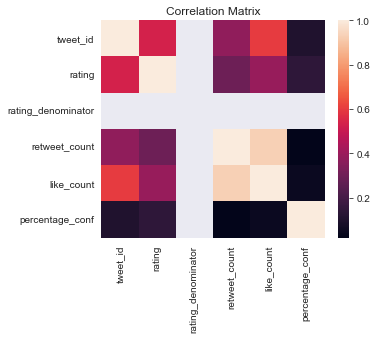

In [89]:
# First let us plot a correlation matrix to see the relationship between our variables

plt.figure(figsize=(5,4))
corr = twitter_clean.corr()
sns.heatmap(corr,)
plt.title('Correlation Matrix',);

We can see rating denominator remains constant in the dataset

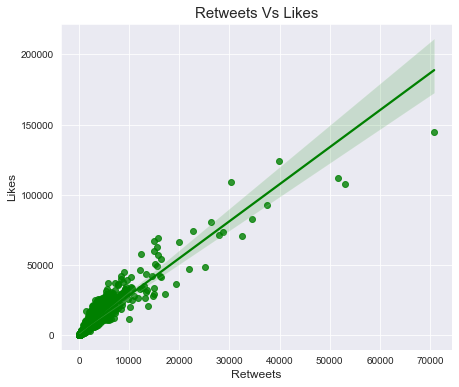

In [90]:
# Plot correlation between likes count and retweets count

plt.figure(figsize=(7,6))
sns.regplot(data=twitter_clean, x='retweet_count', y='like_count', color='g')
plt.title('Retweets Vs Likes', fontsize=15)
plt.xlabel('Retweets', fontsize=12)
plt.ylabel('Likes', fontsize=12);

We see there is a postive correlation between likes count and retweets count

#### 2. What is the most common dog name?

In [91]:
# Get count of top 10 dognames

dog_ = twitter_clean.query('name!="None"').groupby('name')
dog_names = dog_.tweet_id.count().reset_index(name='count').sort_values('count',ascending=False).head(10)
dog_names.head()

,name,count
180,Cooper,10
150,Charlie,9
563,Oliver,9
478,Lucy,9
783,Tucker,9


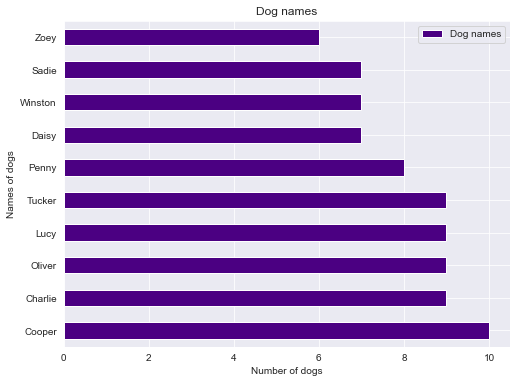

In [92]:
# Plot a vis

dog_names.plot.barh(x='name', y='count', color='indigo', label='Dog names', figsize=(8,6))
plt.xlabel('Number of dogs')
plt.ylabel('Names of dogs')
plt.title('Dog names')
plt.legend();

We see that `Cooper` is the most popular dog name

#### 3. What is the most used tweet source?

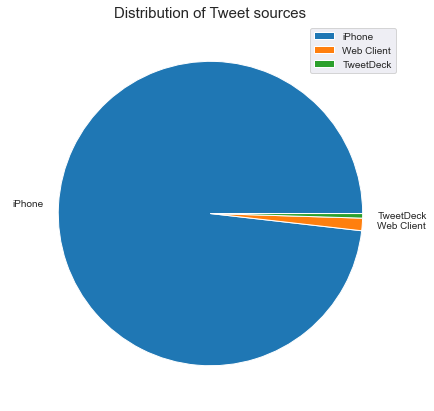

In [93]:
# Plot a pie chart to show tweet sources

twitter_clean.source.value_counts().plot.pie(labels=['iPhone', 'Web Client', 'TweetDeck', 'Vine'], fontsize=10, figsize=(7,7))
plt.title('Distribution of Tweet sources', fontsize=15)
plt.ylabel(' ', fontsize=10)
plt.legend();

Majority of tweets are from iPhones

#### 4. Which dog stage got the most likes and retweets?

In [94]:
# Get the number of retweets and likes for each dog stage

stage_count = (twitter_clean.groupby('dog_stage')[['retweet_count', 'like_count']].sum())
stage_count = stage_count[stage_count != 0].dropna()
stage_count

,retweet_count,like_count
dog_stage,,
doggo,319587.0,960378.0
"doggo, pupper",23511.0,78931.0
floofer,30724.0,93488.0
pupper,330673.0,1099561.0
puppo,126658.0,452344.0


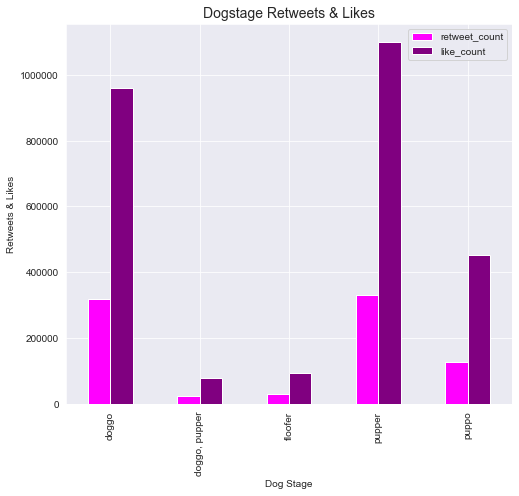

In [95]:
# Plot a barchart with proper labels

stage_count.plot(kind='bar', color=('magenta', 'purple'), figsize=(8,7))
plt.title('Dogstage Retweets & Likes', fontsize=14)
plt.xlabel('Dog Stage')
plt.ylabel('Retweets & Likes')
plt.xticks(range(5), labels=['doggo', 'doggo, pupper', 'floofer', 'pupper', 'puppo'])
plt.ticklabel_format(axis='y', style='plain')
plt.show();

We see that `pupper` gets the most likes & retweets.

#### 5. Which dog breed got the most likes and retweets?

In [96]:
# Preview data to be visualized

twitter_clean.groupby('dog_breed').tweet_id.count().count()

113

For a finer analysis, we will explore the top 10 dog breeds and least 10 dog breeds based on retweets and likes

In [97]:
# Get the top 10 number of likes and retweets for each breed of dogs

top10_breed = (twitter_clean.groupby('dog_breed')[['retweet_count', 'like_count']].sum())
top10_breed = top10_breed.sort_values(['retweet_count', 'like_count'], ascending=[False, False]).head(10)
top10_breed

,retweet_count,like_count
dog_breed,,
Golden Retriever,475516,1680794
Labrador Retriever,309358,1030365
Pembroke,237067,906528
Chihuahua,211039,669848
Samoyed,156219,482514
French Bulldog,132302,526558
Cocker Spaniel,118854,352524
Chow,106451,387104
Pug,94485,325671


In [98]:
# Get the least 10 number of likes and retweets for each breed of dogs

least10_breed = (twitter_clean.groupby('dog_breed')[['retweet_count', 'like_count']].sum())
least10_breed = least10_breed.sort_values(['retweet_count', 'like_count'], ascending=[True, True]).head(10)
least10_breed

,retweet_count,like_count
dog_breed,,
Japanese Spaniel,355,1116
Groenendael,442,1959
Entlebucher,557,2257
Irish Wolfhound,657,1290
Brabancon Griffon,684,2240
Standard Schnauzer,722,1694
Scotch Terrier,1005,3026
Clumber,1494,6204
Silky Terrier,1498,6246


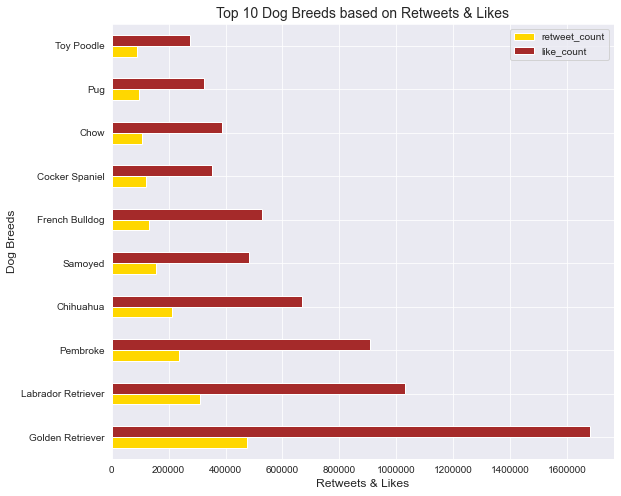

In [99]:
# Plot a vis for the top 10 breeds

top10_breed.plot(kind='barh', color=('gold', 'brown'), figsize=(9,8))
plt.title('Top 10 Dog Breeds based on Retweets & Likes', fontsize=14)
plt.ylabel('Dog Breeds', fontsize=12)
plt.xlabel('Retweets & Likes', fontsize=12)
plt.ticklabel_format(axis='x', style='plain')
plt.show();

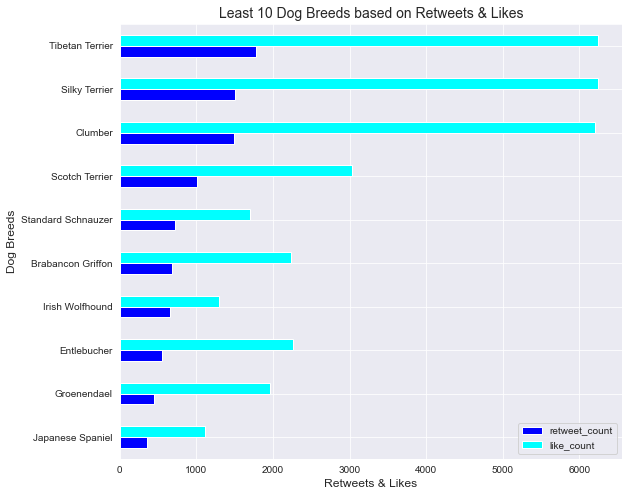

In [100]:
# Plot a vis for the least 10 breeds

least10_breed.plot(kind='barh', color=('blue', 'cyan'), figsize=(9,8))
plt.title('Least 10 Dog Breeds based on Retweets & Likes', fontsize=14)
plt.ylabel('Dog Breeds', fontsize=12)
plt.xlabel('Retweets & Likes', fontsize=12)
plt.ticklabel_format(axis='x', style='plain')
plt.show();

We see that the `Golden Retriever` is the most retweeted and liked breed followed by the `Labrador Retriever`.

On the other hand, the `Japanese Spaniel` is the least retweeted and liked breed of dog.

#### 6. Which month(s) had the highest retweets and likes?

To analyze this let us explore our data by month

In [101]:
# Get retweets and likes for each month

tweet_month = twitter_clean.set_index('timestamp').groupby(pd.Grouper(freq='M'))[['retweet_count', 'like_count']].sum()
tweet_month

,retweet_count,like_count
timestamp,,
2015-11-30,86042,223622
2015-12-31,366646,916950
2016-01-31,158665,453860
2016-02-29,105225,311796
2016-03-31,129015,395043
2016-04-30,65632,204063
2016-05-31,83603,258308
2016-06-30,264458,673037
2016-07-31,154700,465794


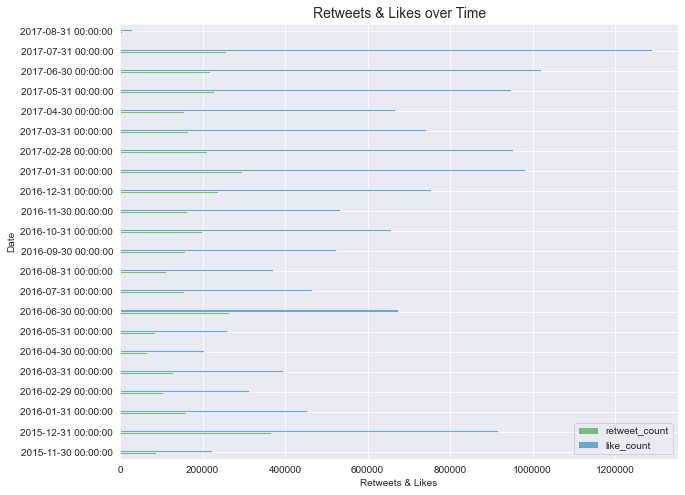

In [102]:
# Strip timestamp and plot visuals with proper labels

tweet_month.plot(kind='barh', alpha=0.6, width=0.2, color=('C2', 'C0'), figsize=(10,8))
plt.title('Retweets & Likes over Time', fontsize=14)
plt.ylabel('Date')
plt.xlabel('Retweets & Likes')
plt.ticklabel_format(axis='x', style='plain')
plt.show();

Most likes were from August 2017 and most retweets were from Dec 2015 & Jan 2017.

April 2016 had the least number of likes and retweets.

#### 7. Do tweets with higher scores (ratings) get better retweets and likes?

First, let us see the distribution of ratings

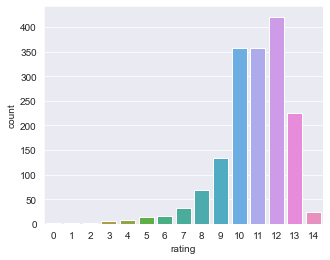

In [103]:
# Distribution of ratings

plt.figure(figsize=(5,4))
sns.countplot(data=twitter_clean, x='rating');

We see it is very skewed to the left and most dogs are scored `12/10`

In [104]:
# Get retweets count and likes count for each rating

ratings = (twitter_clean.groupby('rating')[['retweet_count', 'like_count']].sum())

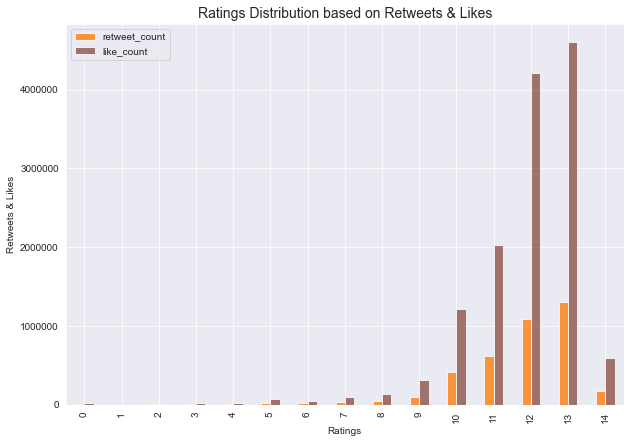

In [105]:
# Plot distribution chart

ratings.plot(kind='bar', alpha=0.8, width=0.5, color=('C1', 'C5'), figsize=(10,7))
plt.title('Ratings Distribution based on Retweets & Likes', fontsize=14)
plt.xlabel('Ratings')
plt.ylabel('Retweets & Likes')
plt.ticklabel_format(axis='y', style='plain')
plt.show();

The likes and retweets increases with ratings score. We can also see that dogs with ratings score of `13/10` got the most retweets and likes followed by dogs with ratings score of `12/10`.

#### _Which dog is the most popular?_

The dog with the most number of retweets and likes is the most popular

In [106]:
popular = twitter_clean.sort_values(['retweet_count', 'like_count'], ascending=[False, False])
popular.head(1)

,tweet_id,timestamp,source,text,rating,rating_denominator,name,dog_stage,retweet_count,like_count,jpg_url,dog_breed,percentage_conf
680,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,10,None,doggo,70807,145006,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador Retriever,82.5333


Scoring  `13/10` with over 145,000 likes, and over 70,000 retweets, our most popular dog is a __`Labrador Retriever`__.

<a id='store'></a>
## Storage

In [107]:
# Save cleaned master DataFrame in a CSV file

twitter_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='conclusions'></a>
## Conclusions

> Our data was gathered from different sources, including manual download of archived tweets, programmatic download of image predictions flatfile and data pulled from Twitter API. The data was cleaned using the define, code and test steps and from our exploratory analysis:
1. Retweets count and like counts are positively correlated which makes sense because a retweet will most likely have been liked in the first place.
2. The two most common dog names are `Cooper` and `Charlie`.
3. Majority of the tweets were made from iPhones. No analysis of the correlation with retweets and likes was deemed necessary because iPhones accounted for over 90% of tweet sources in our dataset.
4. `Pupper` is the most retweeted and most liked dog stage.
5. `Golden Retrievers` had the most likes and retweets followed by Labrador Retrievers, while Japanese Spaniels got the least number of likes and retweets
6. Most likes were from August 2017 whereas most retweets were from Dec 2015 & Jan 2017. This could be because those are festive periods and dog owners would usually tweet colourful pictures of their dogs. Also occasional events for dogs such as 'BarkWeek' could also affect number of retweets and likes.
7. Higher ratings had higher retweets and likes. Also, most dogs were scored `12/10` and the most popular dog is a `Labrador Retriever 'doggo'`.

### Limitations
> Albeit our primary focus was wrangling, a lot of incomplete data skewed off our analysis a bit and also, a larger dataset covering a wider time period would have provided more parameters for a better analysis.


From our findings, the Golden Retriever is the most popular dog breed and majorly, factors such as __dog stage__ and __breed__ determined numbers of retweets and/or likes.